## Problem Statement

**To predict the price of used car given the data collected from various sources.
To build a model that can assign a price for a vehicle by evaluating car features and other variables which will affect the price of the used car.**

**Independent Variable:**
* Transmission
* Owner Type
* Mileage
* Engine
* Years
* Kilometers Driven
* Fuel Type
* New Price
* Seats
* Location 
<br>

**Dependent Variable:**
* Price

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***

### Import data
- A training set which we will split further to train and validation set to train and test the model.

In [2]:
usedcars = pd.read_csv("train-data.csv")

In [3]:
usedcars.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


***

### About Data

<font size="10" face="Calibri">
<table style="width:80%">
<tr>
    <th width="7%">S.N</th>
    <th width="15%">Feature</th>
    <th width="20%" style="text-align:center">Type of Data</th>
    <th width="40%" style="text-align:left">Description</th>
    </tr>
    <tr>
        <th>1</th>
        <td>Name</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The brand and model of the car</td>
        </tr>
    <tr>
        <th>2</th>
        <td>Location</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The location in which the car is being sold or is available for purchase</td>
        </tr>
    <tr>
        <th>3</th>
        <td>Year</td>
        <td style="text-align:center">Numerical -Interval</td>
        <td style="text-align:left">The year or edition of the model</td>
        </tr>
    <tr>
        <th>4</th>
        <td>Kilometers_Driven</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The total kilometres driven in the car by the previous owner(s) in KM</td>
        </tr>
    <tr>
        <th>5</th>
        <td>Fuel_Type</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The type of fuel used by the car</td>
        </tr>
    <tr>
        <th>6</th>
        <td>Transmission</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The type of transmission used by the car</td>
        </tr>
    <tr>
        <th>7</th>
        <td>Owner_Type</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">Whether the ownership is Firsthand, Second hand or other</td>
        </tr>
    <tr>
        <th>8</th>
        <td>Mileage</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The standard mileage offered by the car company in kmpl or km/kg</td>
        </tr>
    <tr>
        <th>9</th>
        <td>Engine</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The displacement volume of the engine in CC</td>
        </tr>
    <tr>
        <th>10</th>
        <td>Power</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The maximum power of the engine in bhp</td>
        </tr>
    <tr>
        <th>11</th>
        <td>Seats</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The number of seats in the car</td>
        </tr>
    <tr>
        <th>12</th>
        <td>New_Price</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The price of a new car of the same model</td>
        </tr>
    <tr>
        <th>13</th>
        <td>Price</td>
        <td style="text-align:center">Numeriical -Ratio</td>
        <td style="text-align:left">The price of the used car in INR Lakhs</td>
    </tr>
</table>

In [4]:
usedcars.shape

(6019, 14)

In [5]:
print("Used Cars Dataset: ")
print("Number of Rows: ", usedcars.shape[0])
print("Number of columns: ", usedcars.shape[1])

Used Cars Dataset: 
Number of Rows:  6019
Number of columns:  14


In [6]:
usedcars.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [8]:
#Checking for Null values
usedcars.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
#Number of unique values for each variable
usedcars.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [10]:
#list(usedcars["Name"].unique())

**The variable name contains company name followed by model name. Because of this the number of unique values in this categorical variable is too large. To use this variable we can split the name into two different variables namely Company_name and Model_name**

In [11]:
np.array(usedcars["Location"].unique())

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [12]:
np.array(usedcars["Year"].unique())

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [13]:
np.array(usedcars["Fuel_Type"].unique())

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [14]:
np.array(usedcars["Transmission"].unique())

array(['Manual', 'Automatic'], dtype=object)

In [15]:
np.array(usedcars["Owner_Type"].unique())

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [16]:
#np.array(usedcars["Mileage"].unique())

**The datatype of the variable "Mileage" is object type, it should be converted into float**
<br>
**The variable "Mileage" has two units we have to convert the data such that this variable will have single unit. And the unit is  given after each value, it should be removed.**

In [17]:
kmkg = 0
kmpl = 0
for i in usedcars.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print("The number of rows with unit km/kg : ", kmkg)
print("The number of rows with unit kmpl : ", kmpl)

The number of rows with unit km/kg :  66
The number of rows with unit kmpl :  5951


In [18]:
usedcars[usedcars["Fuel_Type"].isin(["CNG","LPG"])]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,17.5 km/kg,1373 CC,80.46 bhp,7.0,NaN,8.25
5881,5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.70
5902,5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.25
5935,5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,3.10


**Here, we can see that the unit for mileage is km/kg is for the Fuel_Type LPG and CNG.
So, we will be converting the values with unit km/kg to kmpl by following conversion factors.**

1 litre of CNG ~ 0.18 kg
<br>

1 litre of LPG ~ 0.55 kg

In [19]:
#np.array(usedcars["Engine"].unique())

**The datatype of the variable "Engine" is object type, it should be converted into float**
**The unit is given in after each value, it should be removed.**

In [20]:
#np.array(usedcars["Power"].unique())

**The datatype of the variable "Power" is object type, it should be converted into float**
<br>
**The unit given after ecah value should be removed**
<br>
**The unique values also contain a value "null bhp", this can be replaced with Nan value**

In [21]:
usedcars[usedcars["Power"] == "null bhp"]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,NaN,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.20
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,1.75
5925,5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,NaN,2.85
5943,5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,NaN,1.70


In [22]:
np.array(usedcars["Seats"].unique())

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

<hr>

**The variable "Unnamed: 0" will be removed as it is giving the index of the each row and not adding any useful information.**
<br>

**The variable New_Price has around 5195 null values that is 86.31% of the data is missing and that's why we will be removing this variable as well.**

<hr>

### Data Cleaning

In [23]:
#Checking for duplicate values
usedcars.duplicated().sum()

0

In [24]:
#Dropping the variables "Unnamed: 0", "New_Price"
usedcars = usedcars.drop(columns = ["Unnamed: 0", "New_Price"])

In [25]:
usedcars["Company_Name"] = usedcars["Name"].str.split(" ", n = 1, expand = True)[0]
usedcars["Model_Name"] = usedcars["Name"].str.split(" ", n = 2, expand = True)[1]

usedcars["Mileage"] = usedcars["Mileage"].str.split(" ", n = 1, expand = True)[0]

usedcars["Engine"] = usedcars["Engine"].str.split(" ", n = 1, expand = True)[0]

usedcars["Power"] = usedcars["Power"].str.split(" ", n = 1, expand = True)[0]

In [26]:
usedcars.Company_Name.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

**The Company_Name ISUZU is repeated in unique values because of the different cases used, it should be removed.**

In [27]:
usedcars.loc[usedcars.Company_Name == "Isuzu", "Company_Name"] = "ISUZU"

In [28]:
usedcars["Power"].replace(to_replace = "null", value = np.nan, inplace = True)

In [29]:
usedcars["Mileage"] = pd.to_numeric(usedcars["Mileage"], errors = "coerce")
usedcars["Engine"] = pd.to_numeric(usedcars["Engine"], errors = "coerce")
usedcars["Power"] = pd.to_numeric(usedcars["Power"], errors = "coerce")

In [30]:
n=0
for i in usedcars['Fuel_Type']:
    if i == 'CNG':
        usedcars['Mileage'][n] = usedcars['Mileage'][n]*5.55
    elif i == 'LPG':
        usedcars['Mileage'][n] = usedcars['Mileage'][n]*1.81
    n = n+1

<ipython-input-30-bdc1c82524ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars['Mileage'][n] = usedcars['Mileage'][n]*5.55
<ipython-input-30-bdc1c82524ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars['Mileage'][n] = usedcars['Mileage'][n]*1.81


In [31]:
usedcars["Model_Age"] = usedcars["Year"].apply(lambda x : 2020 - x)

<hr>

## Outlier 

In [32]:
usedcars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Model_Age
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,19.237426,1621.276450,113.253050,5.278735,9.479468,6.641801
std,3.269742,9.126884e+04,13.045966,601.355233,53.874957,0.808840,11.187917,3.269742
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000,1.000000
25%,2011.000000,3.400000e+04,15.260000,1198.000000,75.000000,5.000000,3.500000,4.000000
50%,2014.000000,5.300000e+04,18.190000,1493.000000,97.700000,5.000000,5.640000,6.000000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000,9.000000
max,2019.000000,6.500000e+06,186.147000,5998.000000,560.000000,10.000000,160.000000,22.000000


**The variables "Mileage" and "Seats" have minimum values 0.These 0 values can be replaced with Nan values and can be treated as null values**
<br>
**The minimum value in "Engine" is too small.**
<br>
**Have to check if varibles "Kilometers_Driven" and "Mileage"

In [33]:
usedcars["Mileage"].replace(to_replace = 0.0, value = np.nan, inplace = True)
usedcars["Seats"].replace(to_replace = 0.0, value = np.nan, inplace = True)

In [34]:
usedcars[usedcars.Engine < 600]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.0,Mahindra,E,4


In [35]:
usedcars["Engine"].replace(to_replace = 72.0, value = np.nan, inplace = True)

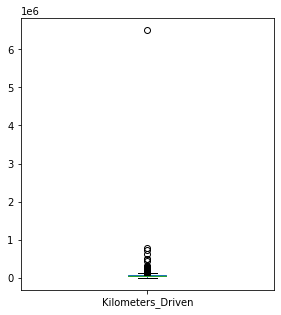

In [36]:
plt.subplot(122)
usedcars["Kilometers_Driven"].plot.box(figsize=(10,5))
plt.show()

In [37]:
usedcars[usedcars.Kilometers_Driven > 1000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0,BMW,X5,3


In [38]:
usedcars.drop(usedcars[usedcars.Kilometers_Driven > 1000000].index, inplace = True )

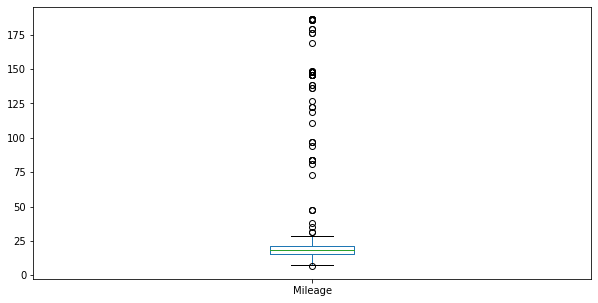

In [39]:
usedcars["Mileage"].plot.box(figsize=(10,5))
plt.show()

In [40]:
usedcars[usedcars.Mileage > 30]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,147.630,998.0,58.16,5.0,1.75,Maruti,Wagon,10
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,38.191,814.0,55.20,5.0,2.35,Hyundai,EON,8
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,147.630,998.0,58.16,5.0,3.25,Maruti,Wagon,7
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,145.965,998.0,67.10,5.0,1.40,Maruti,Zen,12
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,83.805,1196.0,73.00,5.0,4.70,Maruti,Eeco,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,97.125,1373.0,80.46,7.0,8.25,Maruti,Ertiga,3
5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,147.630,998.0,58.16,5.0,3.70,Maruti,Wagon,5
5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,145.410,998.0,58.20,5.0,2.25,Maruti,Wagon,8
5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,179.043,998.0,58.20,4.0,3.10,Maruti,Alto,5


**The extreme values in "Mileage" can be contributed to the Fuel_Type of that particular type. We will not be removing these extreme values**

### Missing value Imputation

In [41]:
usedcars.describe(include = "all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
count,6018,6018,6018.000000,6018.000000,6018,6018,6018,5948.000000,5981.000000,5875.000000,5975.000000,6018.000000,6018,6018,6018.000000
unique,1876,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,30,212,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,Maruti,Swift,NaN
freq,49,790,NaN,NaN,3204,4299,4928,NaN,NaN,NaN,NaN,NaN,1211,353,NaN
mean,NaN,NaN,2013.357594,57668.047690,NaN,NaN,NaN,19.457906,1621.306136,113.228412,5.279665,9.470243,NaN,NaN,6.642406
std,NaN,NaN,3.269677,37878.783175,NaN,NaN,NaN,12.957234,600.860239,53.846427,0.806078,11.165926,NaN,NaN,3.269677
min,NaN,NaN,1998.000000,171.000000,NaN,NaN,NaN,6.400000,624.000000,34.200000,2.000000,0.440000,NaN,NaN,1.000000
25%,NaN,NaN,2011.000000,34000.000000,NaN,NaN,NaN,15.300000,1198.000000,75.000000,5.000000,3.500000,NaN,NaN,4.000000
50%,NaN,NaN,2014.000000,53000.000000,NaN,NaN,NaN,18.240000,1493.000000,97.700000,5.000000,5.640000,NaN,NaN,6.000000
75%,NaN,NaN,2016.000000,73000.000000,NaN,NaN,NaN,21.100000,1984.000000,138.100000,5.000000,9.950000,NaN,NaN,9.000000


In [42]:
usedcars.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                37
Power                143
Seats                 43
Price                  0
Company_Name           0
Model_Name             0
Model_Age              0
dtype: int64

In [43]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Name"])["Engine"].transform("median"))
usedcars.Engine.isnull().sum()

32

In [44]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Company_Name","Model_Name","Fuel_Type","Transmission"])["Engine"].transform("median"))
usedcars.Engine.isnull().sum()

3

In [45]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Company_Name","Model_Name","Transmission"])["Engine"].transform("median"))
usedcars.Engine.isnull().sum()

2

In [46]:
usedcars[usedcars.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,40.88,Land,Rover,12
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,NaN,41.0,5.0,13.00,Mahindra,E,4


In [47]:
usedcars.at[1460,"Engine"] = 2993

In [48]:
usedcars.at[4446,"Engine"] = 1461

In [49]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Name"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

67

In [50]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Model_Name","Fuel_Type","Transmission","Engine"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

20

In [51]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Engine","Fuel_Type","Transmission"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

14

In [52]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Fuel_Type","Transmission"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

4

In [53]:
usedcars[usedcars.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.00,Smart,Fortwo,12
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,2993.0,NaN,NaN,40.88,Land,Rover,12
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,1461.0,41.0,5.0,13.00,Mahindra,E,4
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota,Prius,9


In [54]:
usedcars = usedcars.dropna(subset = ["Mileage"])

3.

In [55]:
usedcars[usedcars.Power.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00,Ford,Fiesta,12
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,17.00,1086.0,NaN,5.0,1.30,Hyundai,Santro,15
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10,Hyundai,Santro,13
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85,Hyundai,Santro,15
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67,Hyundai,Santro,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.20,Hyundai,Santro,14
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,NaN,1.75,Maruti,Estilo,12
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,2.85,Skoda,Laura,10
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,15.10,2112.0,NaN,6.0,1.70,Mahindra,Jeep,18


In [56]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Name"])["Power"].transform("median"))
usedcars.Power.isnull().sum()

111

In [57]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Transmission","Fuel_Type","Engine"])["Power"].transform("median"))
usedcars.Power.isnull().sum()

25

In [58]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine","Transmission"])["Power"].transform("median"))
usedcars.Power.isnull().sum()

23

In [59]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine"])["Power"].transform("median"))
usedcars["Power"].isnull().sum()

19

In [60]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Engine","Fuel_Type","Transmission"])["Power"].transform("median"))
usedcars["Power"].isnull().sum()

15

In [61]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Engine"])["Power"].transform("median"))
usedcars["Power"].isnull().sum()

15

In [62]:
usedcars = usedcars.dropna(subset = ["Power"])

4. Seats


In [63]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Name"])["Seats"].transform("median"))
usedcars.Seats.isnull().sum()

35

In [64]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Company_Name","Model_Name"])["Seats"].transform("median"))
usedcars.Seats.isnull().sum()

3

In [65]:
usedcars[usedcars.Seats.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,1.50,Maruti,Estilo,12
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,2.50,Maruti,Estilo,10
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,1.75,Maruti,Estilo,12


In [66]:
usedcars.at[2369,"Seats"] = 5
usedcars.at[3882,"Seats"] = 5
usedcars.at[5893,"Seats"] = 5

In [67]:
usedcars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Company_Name         0
Model_Name           0
Model_Age            0
dtype: int64

### Data Visualization

In [68]:
usedcars.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Company_Name', 'Model_Name', 'Model_Age'],
      dtype='object')

In [69]:
quant = [i for i in usedcars.columns if usedcars.dtypes[i] != 'object']

qual = [i for i in usedcars.columns if usedcars.dtypes[i] == 'object']

In [70]:
quant

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Model_Age']

In [71]:
qual

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Company_Name',
 'Model_Name']

#### Univariate Analysis

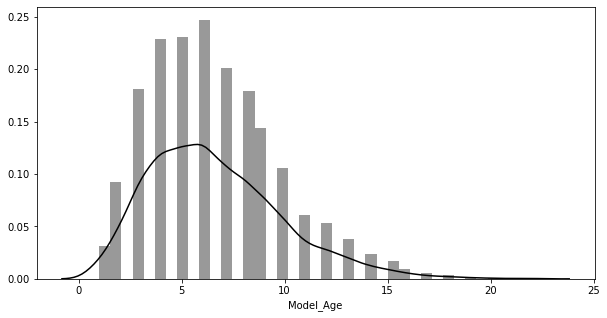

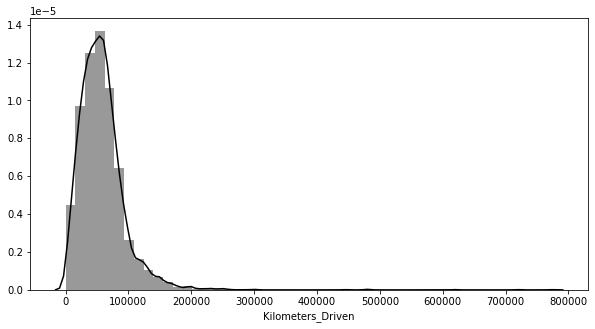

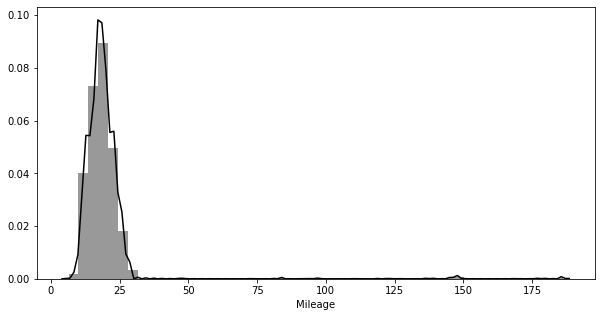

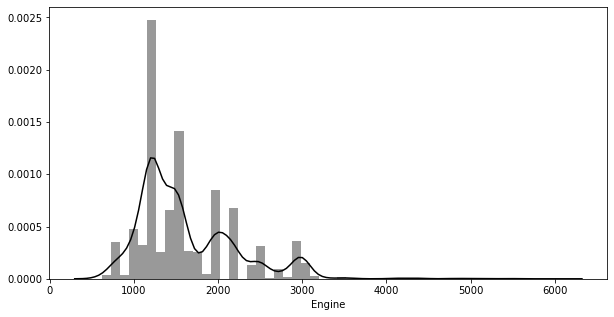

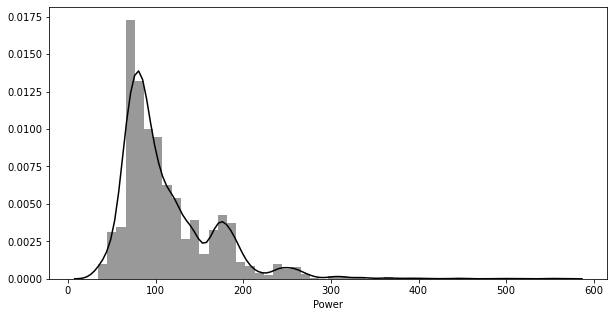

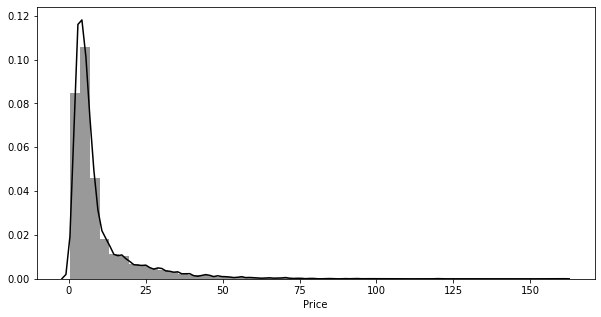

In [72]:
for i in ['Model_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']:
    plt.figure(figsize=(10, 5))
    sns.distplot(usedcars[i],color="black");
    plt.show()

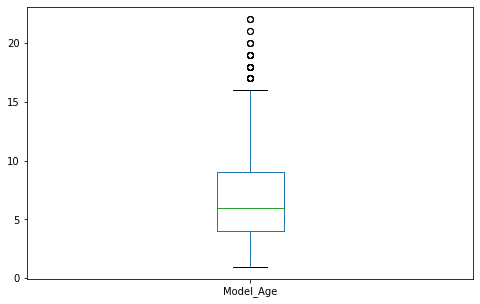

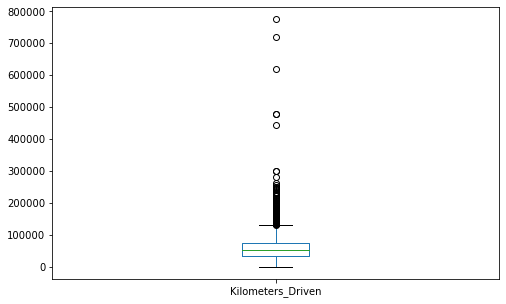

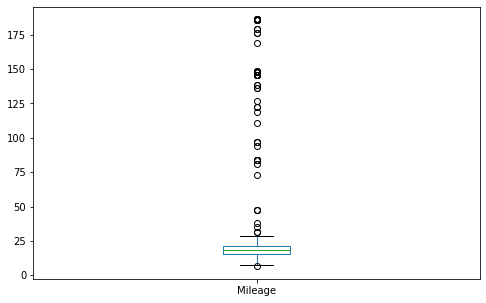

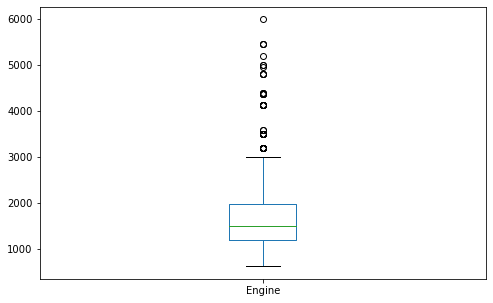

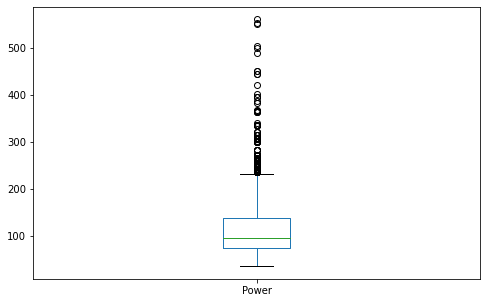

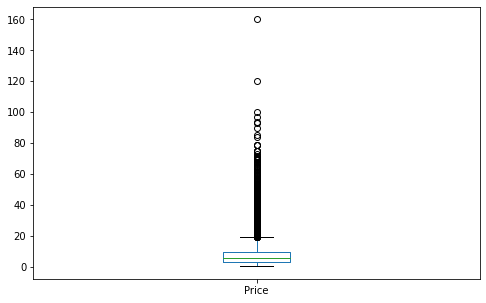

In [73]:
for i in ["Model_Age", 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']:
    usedcars[i].plot.box(figsize=(8,5))
    plt.show()

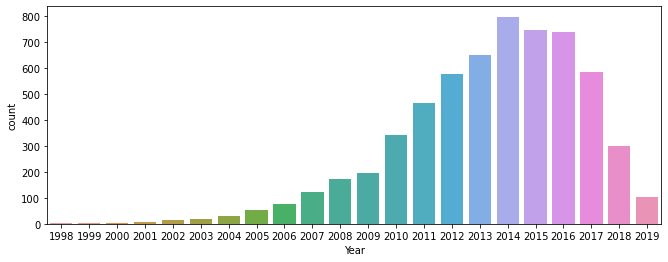

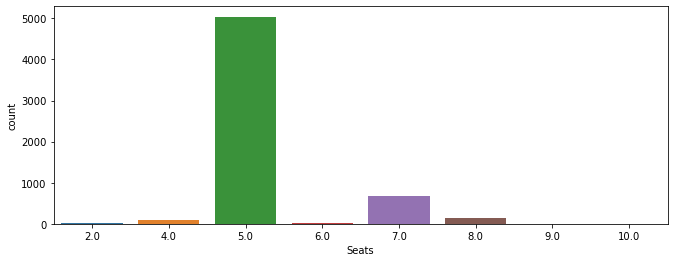

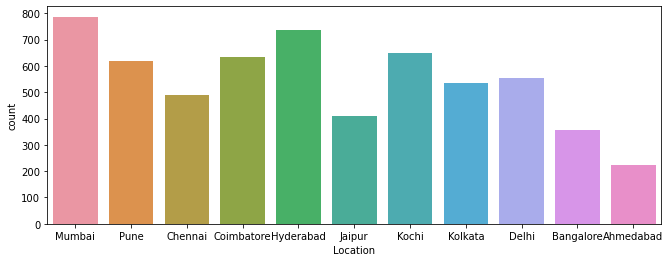

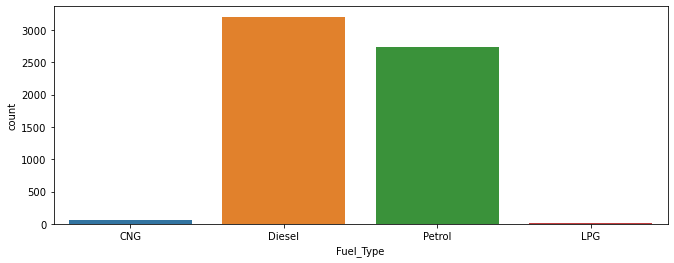

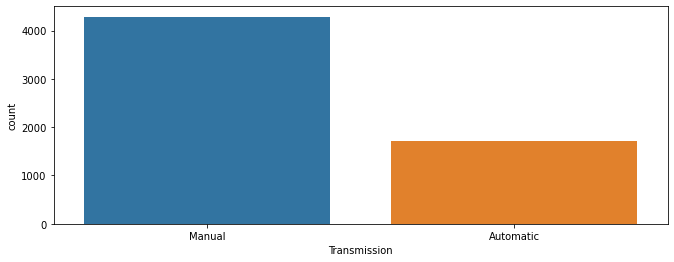

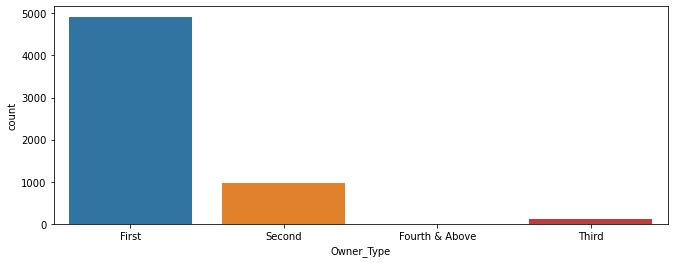

In [74]:
for i in ["Year","Seats",'Location','Fuel_Type','Transmission','Owner_Type']:
    plt.figure(figsize=(11, 4))
    sns.countplot(x = i , data = usedcars)
    plt.show()

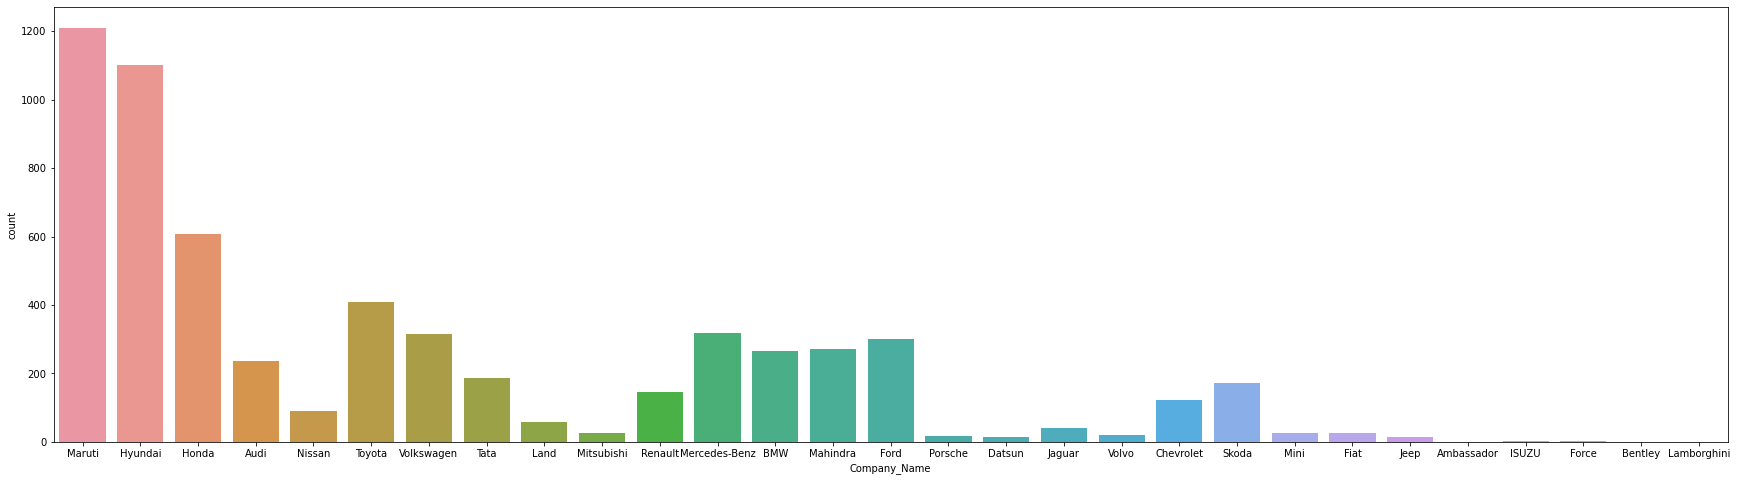

In [75]:
for i in ['Company_Name']:
    plt.figure(figsize=(30, 8))
    sns.countplot(x = i , data = usedcars)
    plt.show()

#### Bivariate

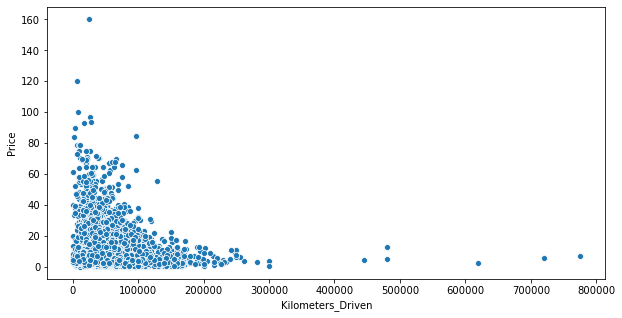

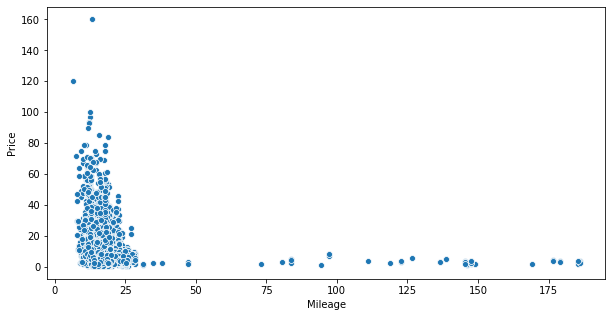

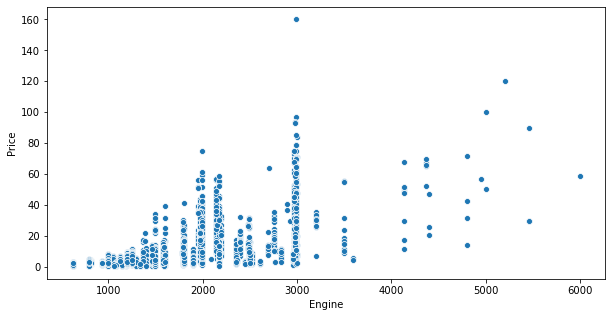

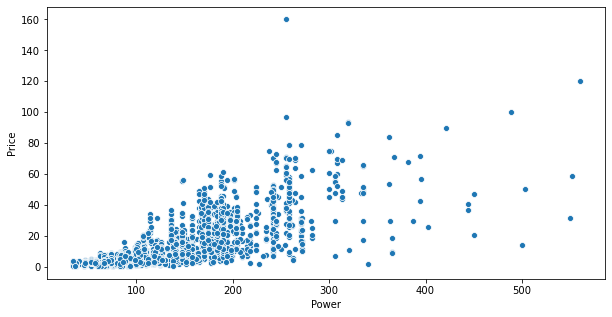

In [76]:
for i in ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']:
    plt.figure(figsize = (10,5))
    sns.scatterplot(x = usedcars[i], y = usedcars["Price"])

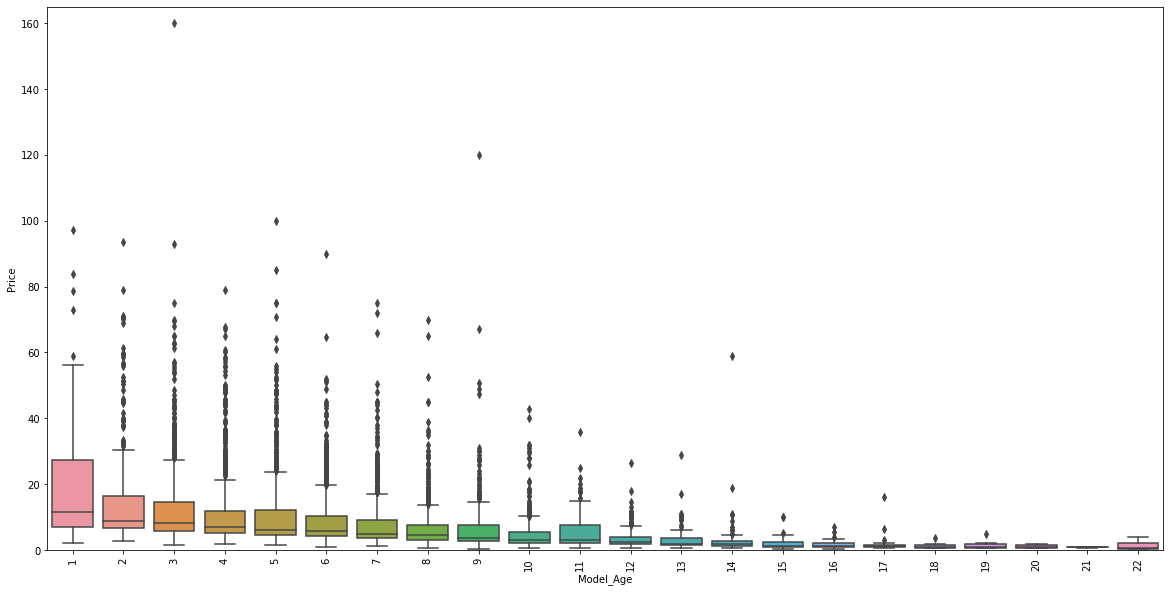

In [77]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x = "Model_Age", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

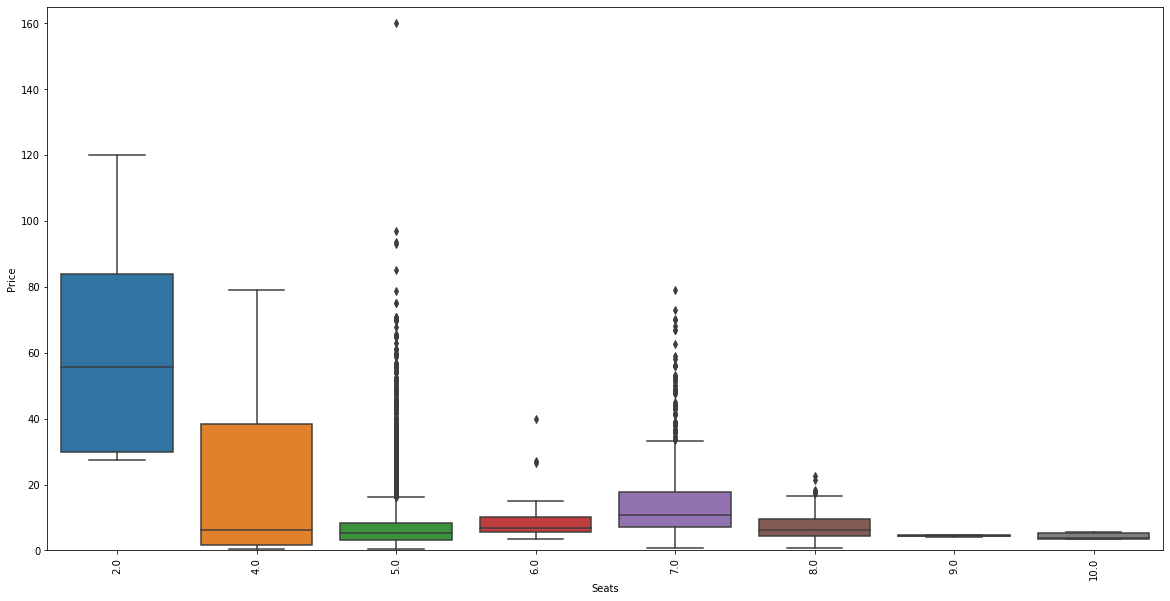

In [78]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x = "Seats", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

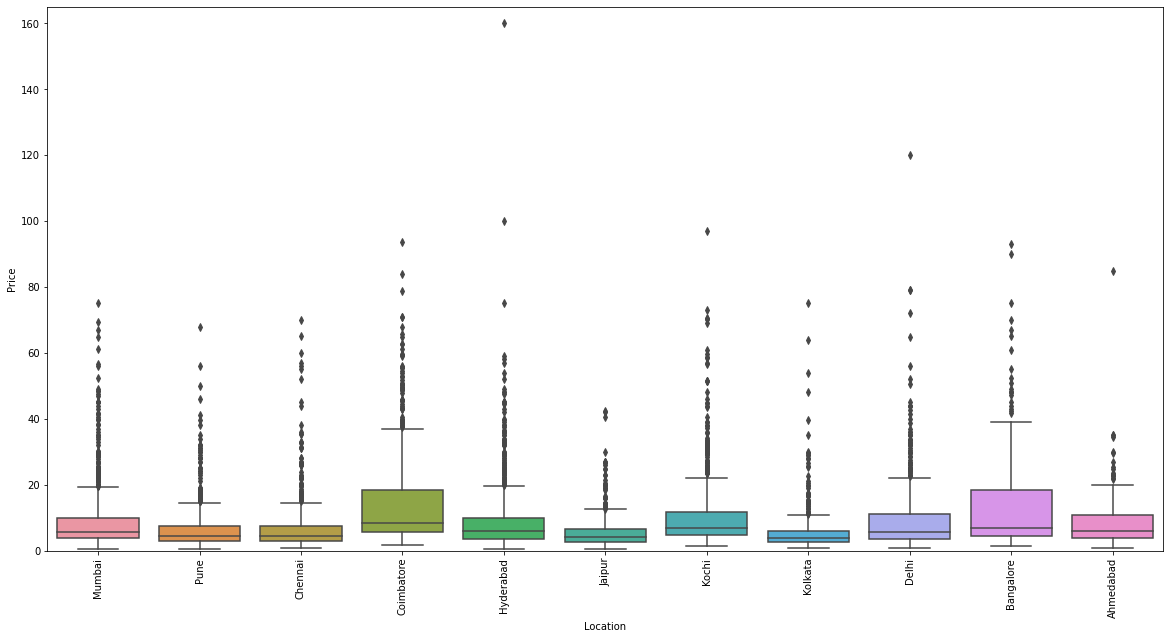

In [79]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x = "Location", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

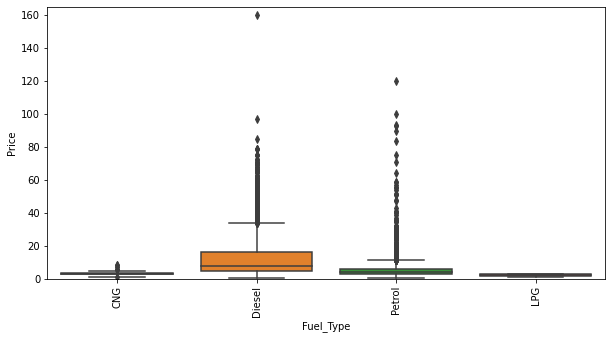

In [80]:
plt.figure(figsize=(10, 5))
fig = sns.boxplot(x = "Fuel_Type", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

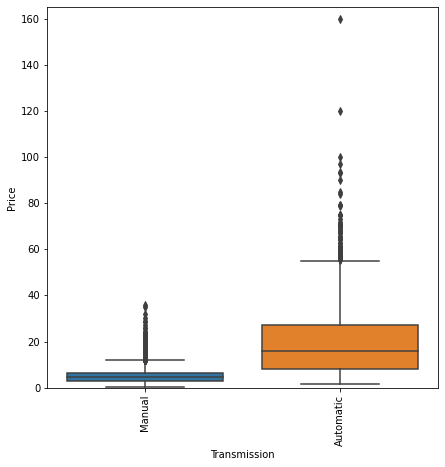

In [81]:
plt.figure(figsize=(7, 7))
fig = sns.boxplot(x = "Transmission", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

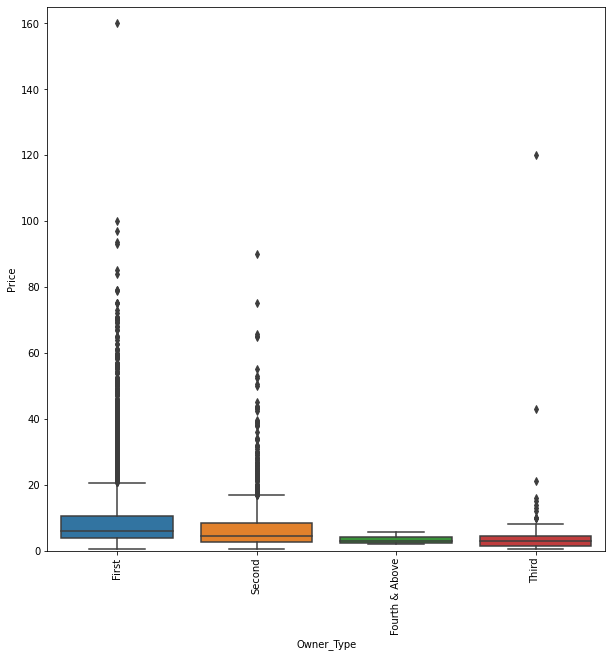

In [82]:
plt.figure(figsize=(10, 10))
fig = sns.boxplot(x = "Owner_Type", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

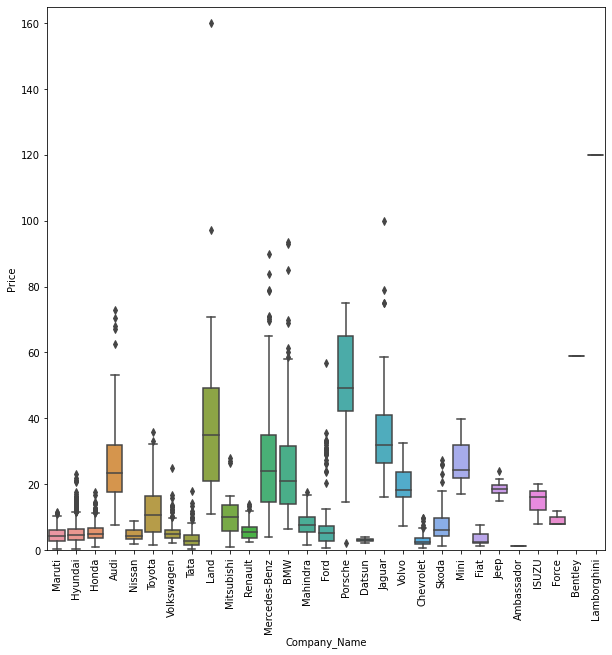

In [83]:
plt.figure(figsize=(10, 10))
fig = sns.boxplot(x = "Company_Name", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

#### Multivariate

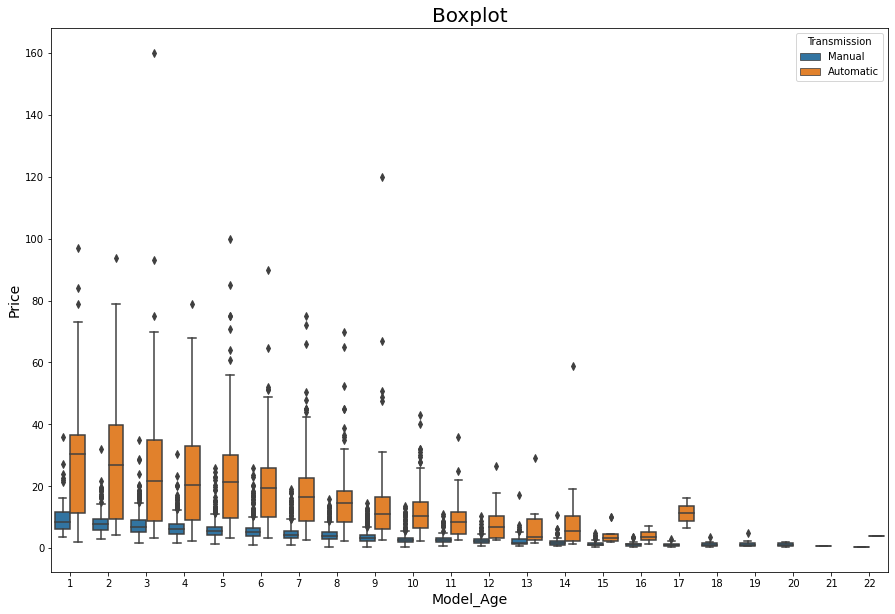

In [85]:
plt.figure(figsize=(15,10))
sns.boxplot(data=usedcars, x="Model_Age", y="Price", hue='Transmission')
plt.xlabel("Model_Age", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

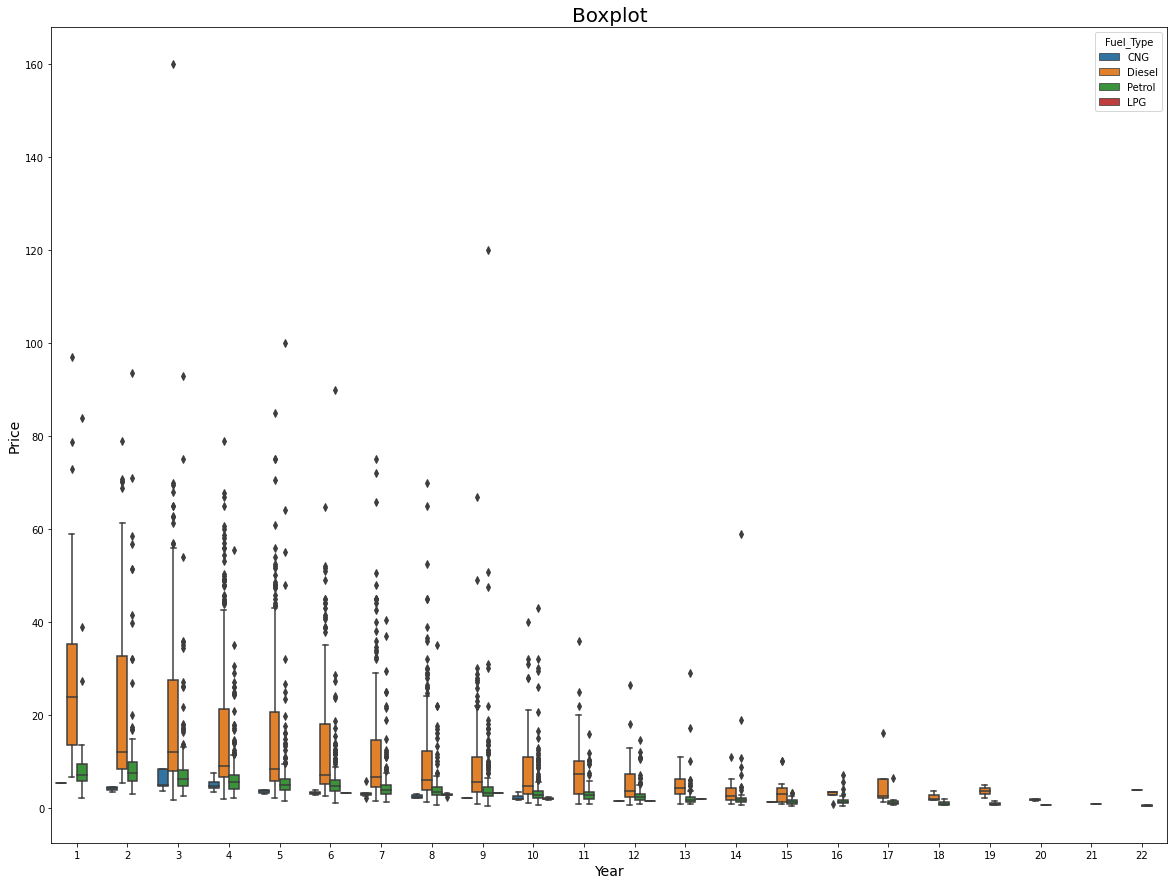

In [86]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Model_Age", y="Price", hue="Fuel_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

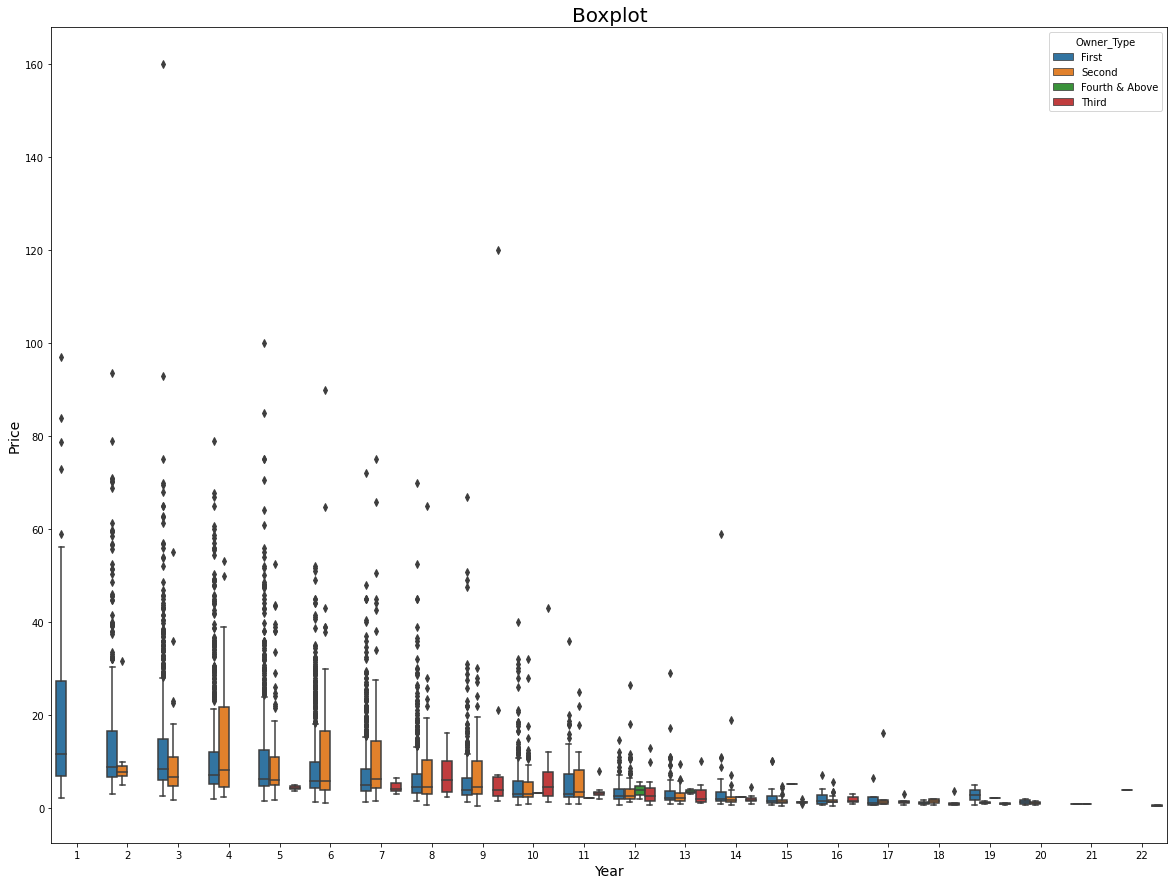

In [87]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Model_Age", y="Price", hue="Owner_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

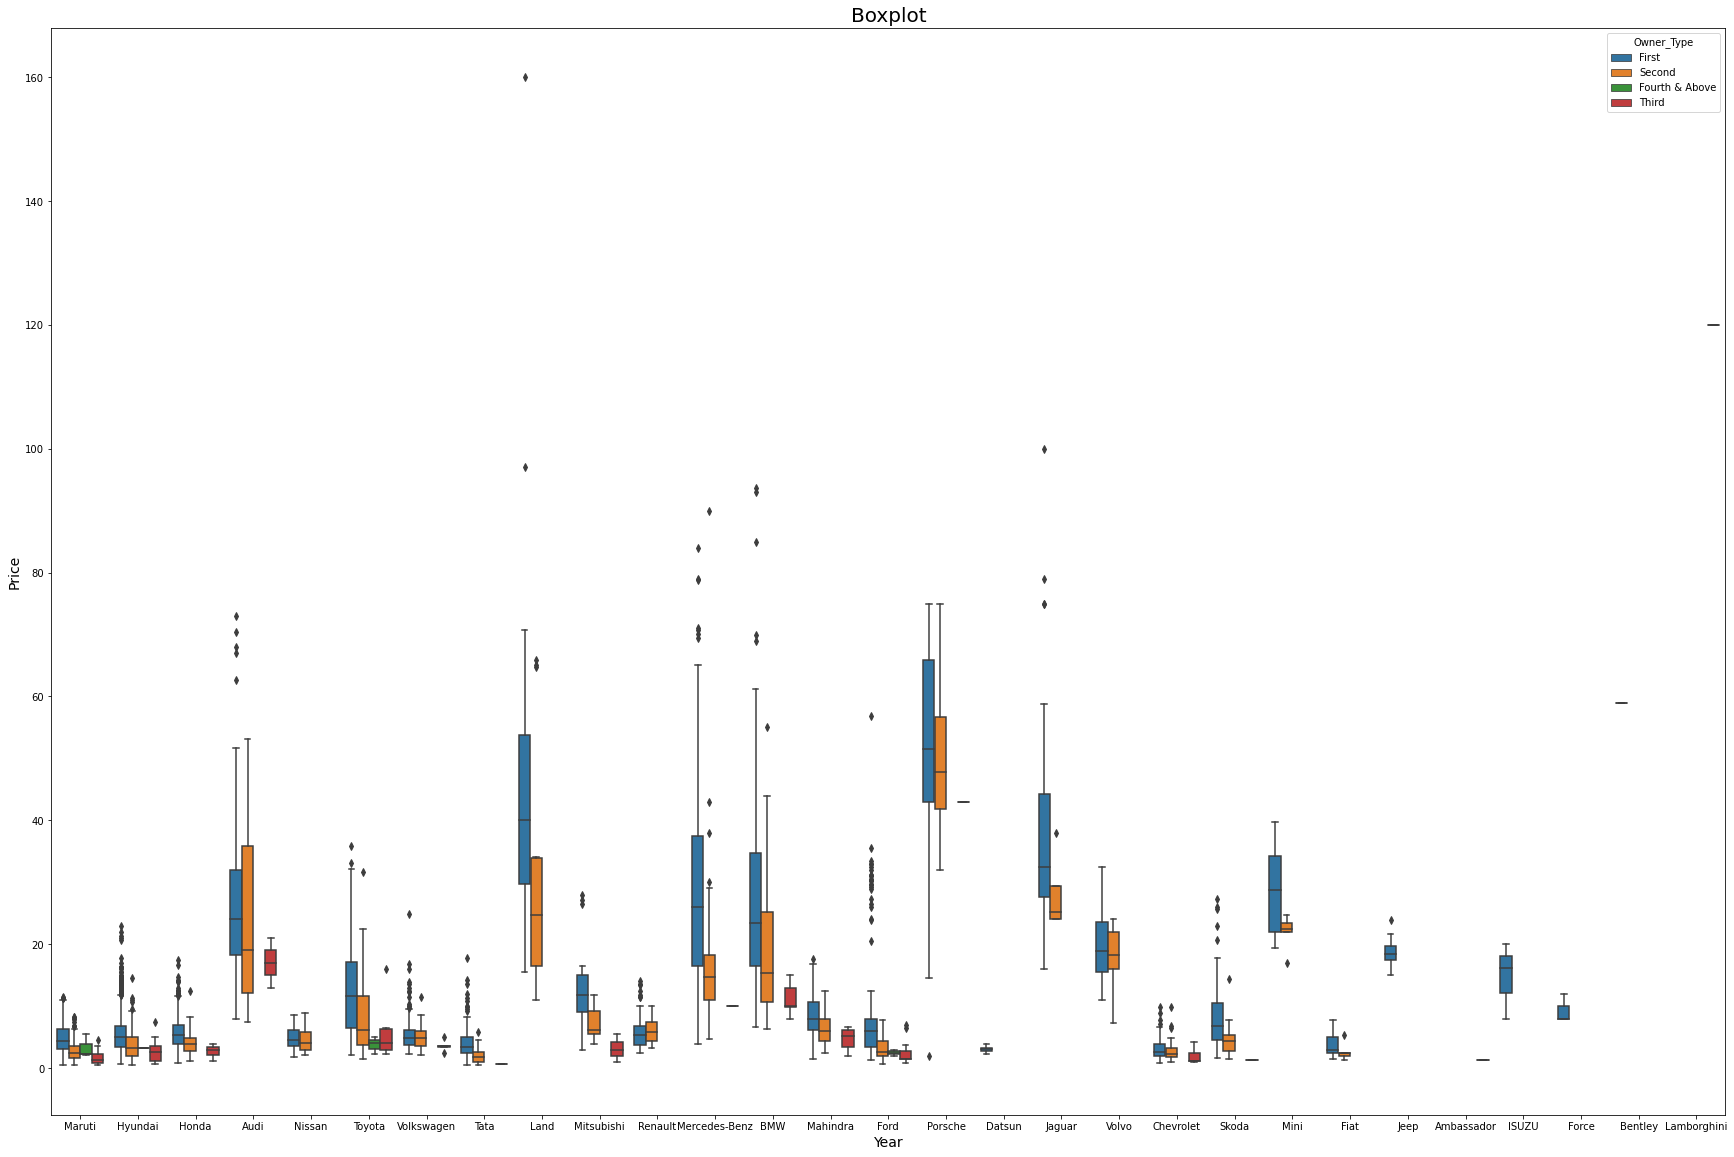

In [88]:
plt.figure(figsize=(30,20))
sns.boxplot(data=usedcars, x="Company_Name", y="Price", hue="Owner_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

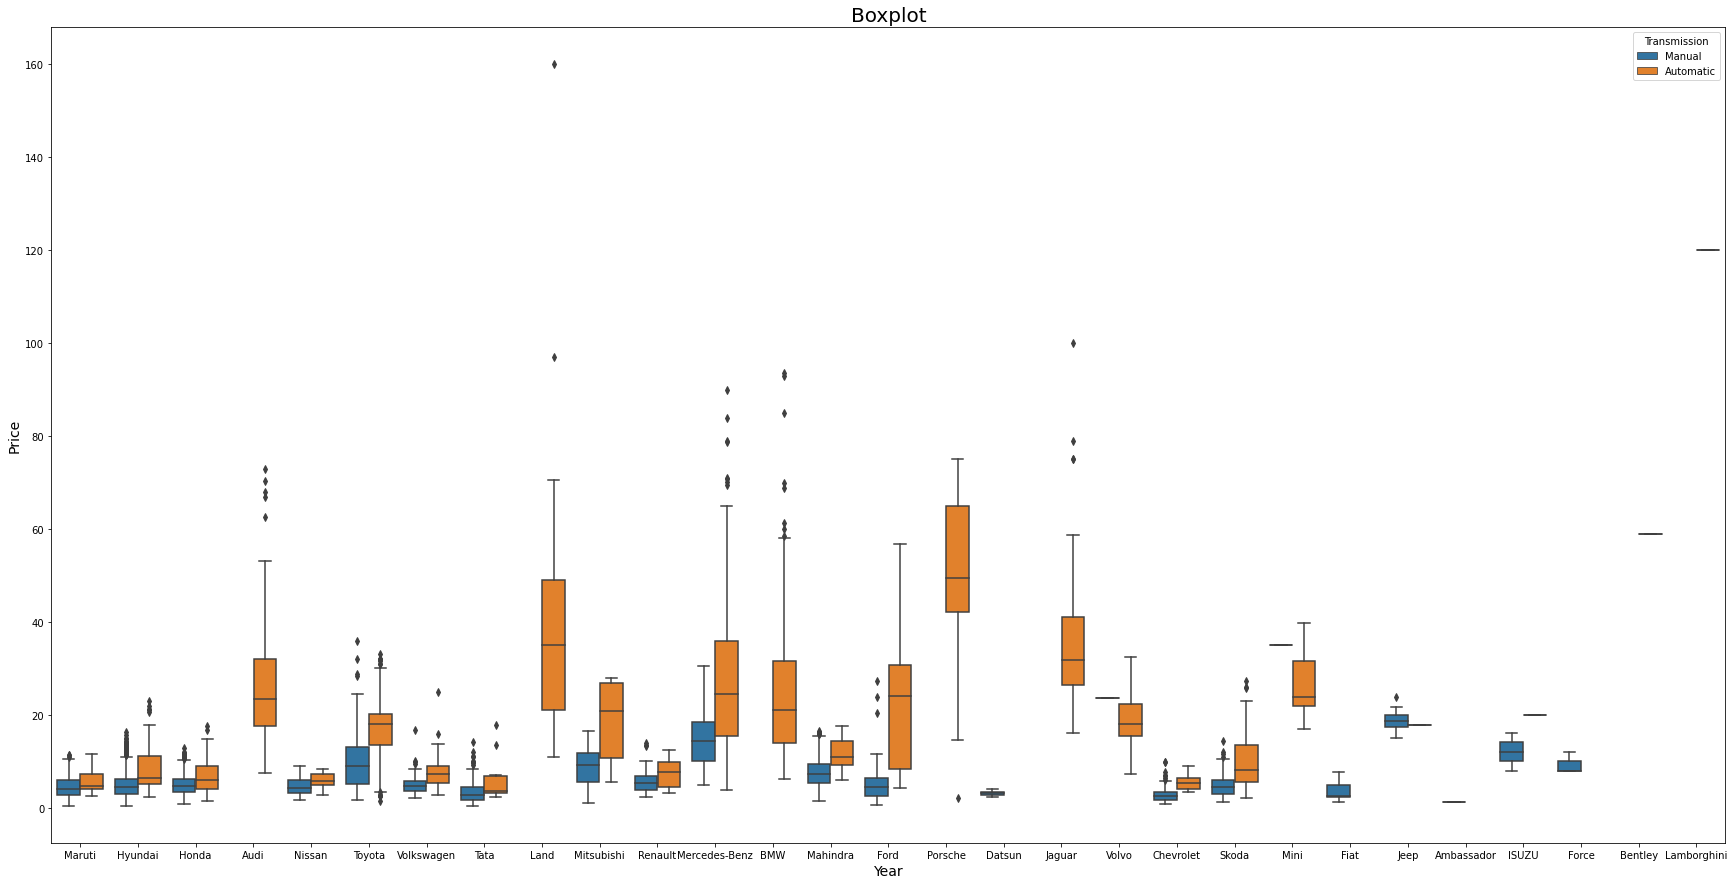

In [89]:
plt.figure(figsize=(30,15))
sns.boxplot(data=usedcars, x="Company_Name", y="Price", hue="Transmission")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

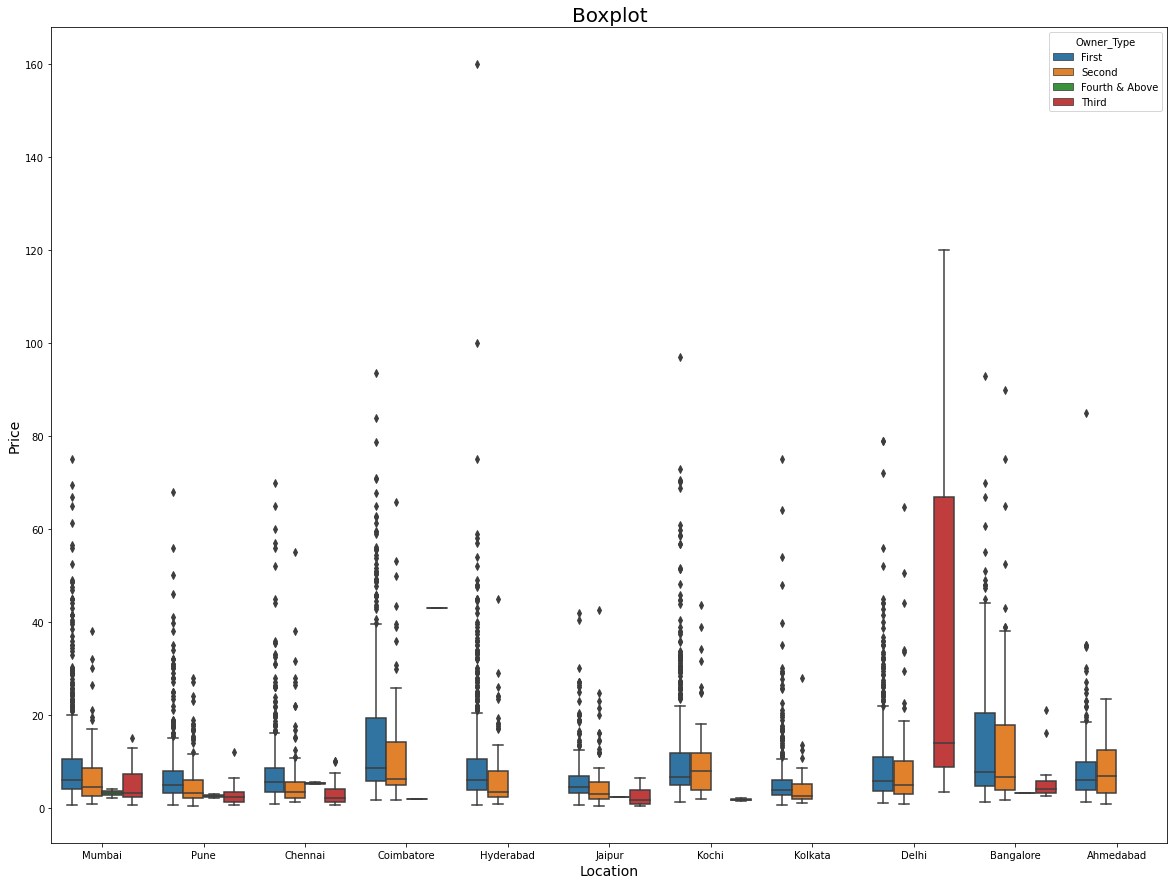

In [90]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Location", y="Price", hue="Owner_Type")
plt.xlabel("Location", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

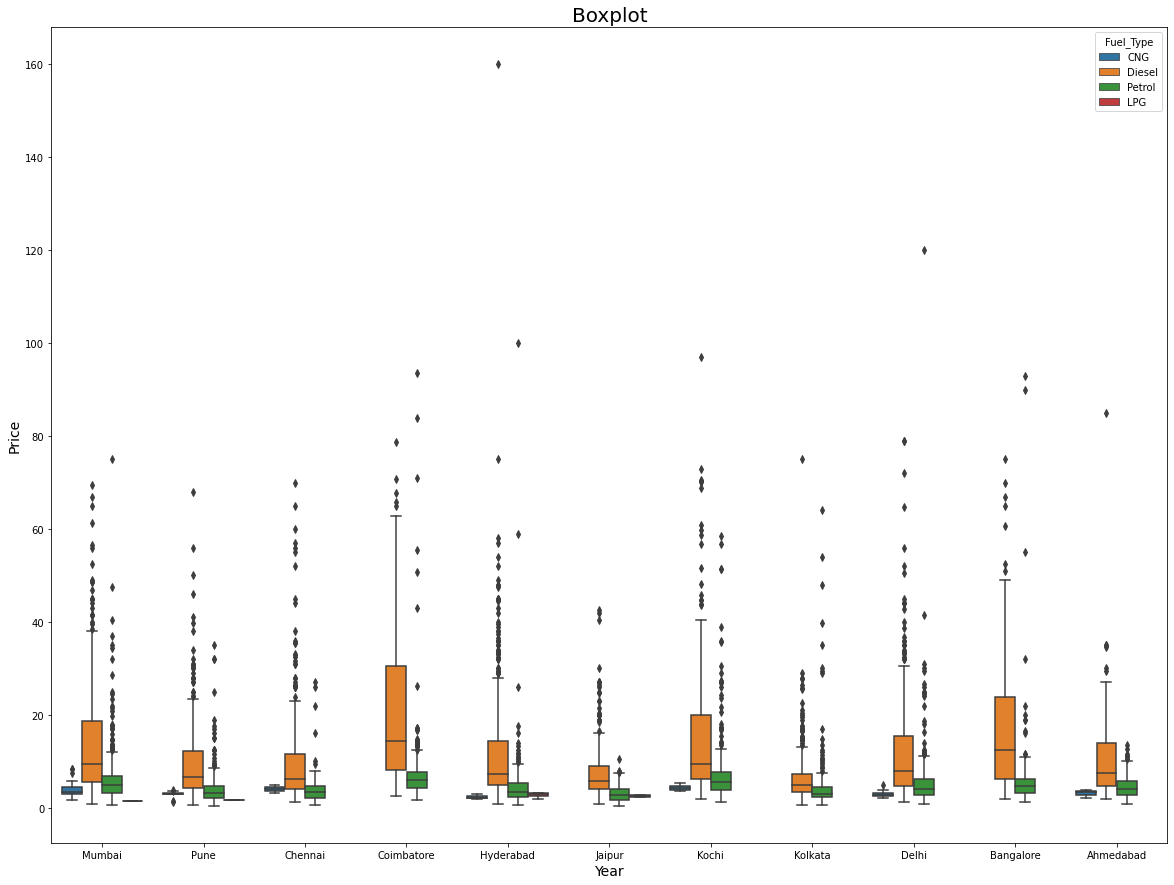

In [91]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Location", y="Price", hue="Fuel_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

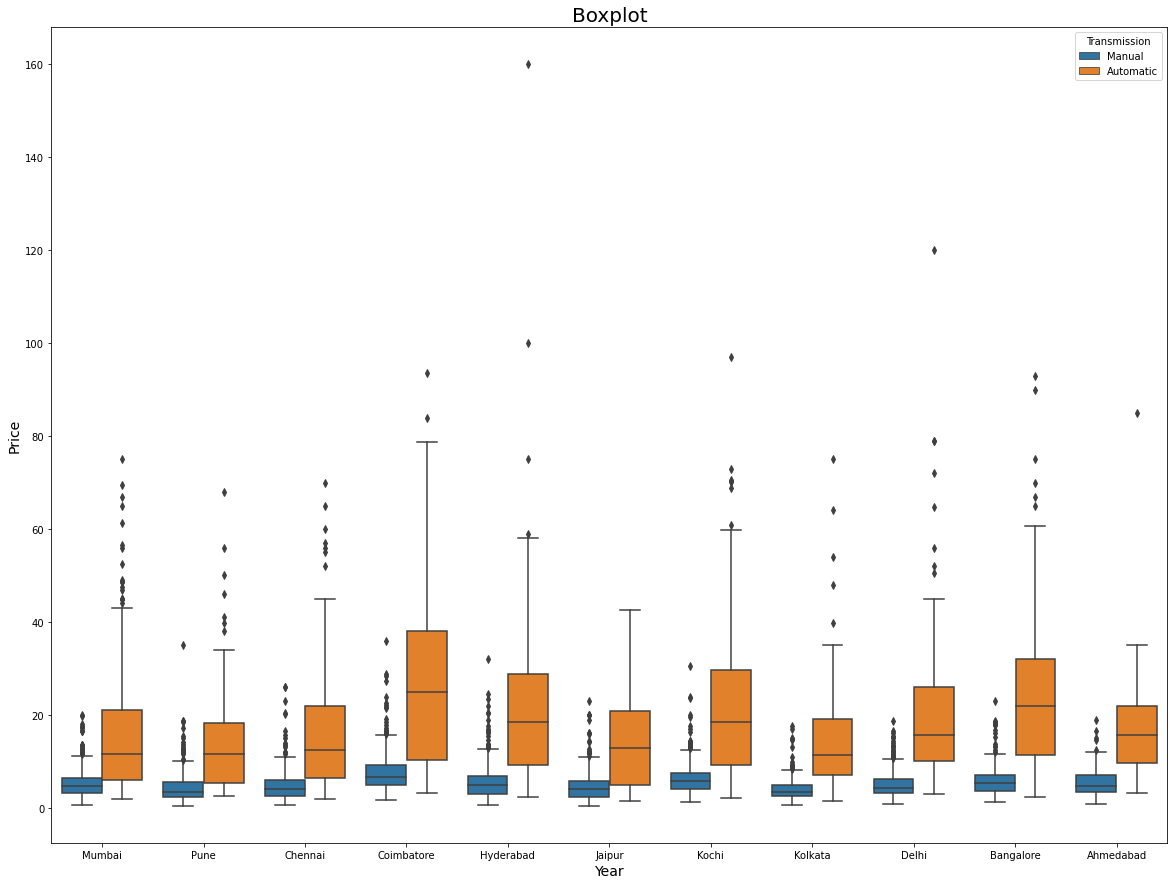

In [92]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Location", y="Price", hue="Transmission")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

In [93]:
usedcars = usedcars.drop(columns = ["Name"])
usedcars = usedcars.drop(columns = ["Location"])
usedcars = usedcars.drop(columns = ["Year"])

### One hot encoding

In [94]:
usedcars.head(1)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
0,72000,CNG,Manual,First,147.63,998.0,58.16,5.0,1.75,Maruti,Wagon,10


In [95]:
Fuel_Type = pd.get_dummies(usedcars["Fuel_Type"])
Transmission = pd.get_dummies(usedcars["Transmission"])
Owner_Type = pd.get_dummies(usedcars["Owner_Type"])

In [96]:
usedcars = pd.concat([usedcars,Transmission,Fuel_Type,Owner_Type],axis=1)

In [97]:
usedcars.head(1)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,...,Automatic,Manual,CNG,Diesel,LPG,Petrol,First,Fourth & Above,Second,Third
0,72000,CNG,Manual,First,147.63,998.0,58.16,5.0,1.75,Maruti,...,0,1,1,0,0,0,1,0,0,0


### Label Encoding

In [98]:
usedcars['Company_Name'].value_counts()

Maruti           1210
Hyundai          1100
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          270
BMW               266
Audi              235
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             90
Land               59
Jaguar             40
Mitsubishi         27
Fiat               26
Mini               26
Volvo              21
Porsche            16
Jeep               15
Datsun             13
ISUZU               3
Force               3
Lamborghini         1
Ambassador          1
Bentley             1
Name: Company_Name, dtype: int64

In [99]:
mean_price_company = pd.DataFrame(usedcars.groupby("Company_Name")['Price'].mean())
mean_price_company = mean_price_company.sort_values(by=['Price'])
print(mean_price_company)

                    Price
Company_Name             
Ambassador       1.350000
Chevrolet        3.044463
Datsun           3.049231
Fiat             3.466923
Tata             3.562849
Maruti           4.520298
Nissan           4.754889
Volkswagen       5.307270
Hyundai          5.364673
Honda            5.411743
Renault          5.799034
Ford             6.889400
Skoda            7.559075
Mahindra         8.051074
Force            9.333333
Mitsubishi      11.058889
Toyota          11.577171
ISUZU           14.696667
Jeep            18.718667
Volvo           18.802857
BMW             25.093684
Audi            25.569787
Mercedes-Benz   26.809874
Mini            26.896923
Jaguar          37.632250
Land            39.232034
Porsche         49.204375
Bentley         59.000000
Lamborghini    120.000000


<b>Numbers have been assigned to brands in such a manner that brand which have higher mean prices got higher number. For 
eg Lamborghini have highest mean price so got the largest number.</b>

In [100]:
usedcars.replace({'Ambassador':1,'Datsun':2, 'Chevrolet':3, 'Fiat':4, 'Tata':5, 'Maruti':6, 'Nissan':7, 'Volkswagen':8, 
                'Honda':9, 'Hyundai':10, 'Renault':11, 'Ford':12, 'Skoda':13, 'Mahindra':14, 'Force':15, 'Mitsubishi':16, 'Toyota':17, 
                'ISUZU':18, 'Jeep':19, 'Volvo':20, 'BMW':21, 'Audi':22, 'Mercedes-Benz':23, 'Mini':24, 'Jaguar':25, 'Land':26, 'Porsche':26,
                'Bentley':27, 'Lamborghini':28},inplace=True)

In [101]:
usedcars = usedcars.drop(columns = ["Fuel_Type","Transmission","Owner_Type","Model_Name"])

In [102]:
usedcars.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Company_Name', 'Model_Age', 'Automatic', 'Manual', 'CNG', 'Diesel',
       'LPG', 'Petrol', 'First', 'Fourth & Above', 'Second', 'Third'],
      dtype='object')

### Correlation Matrix

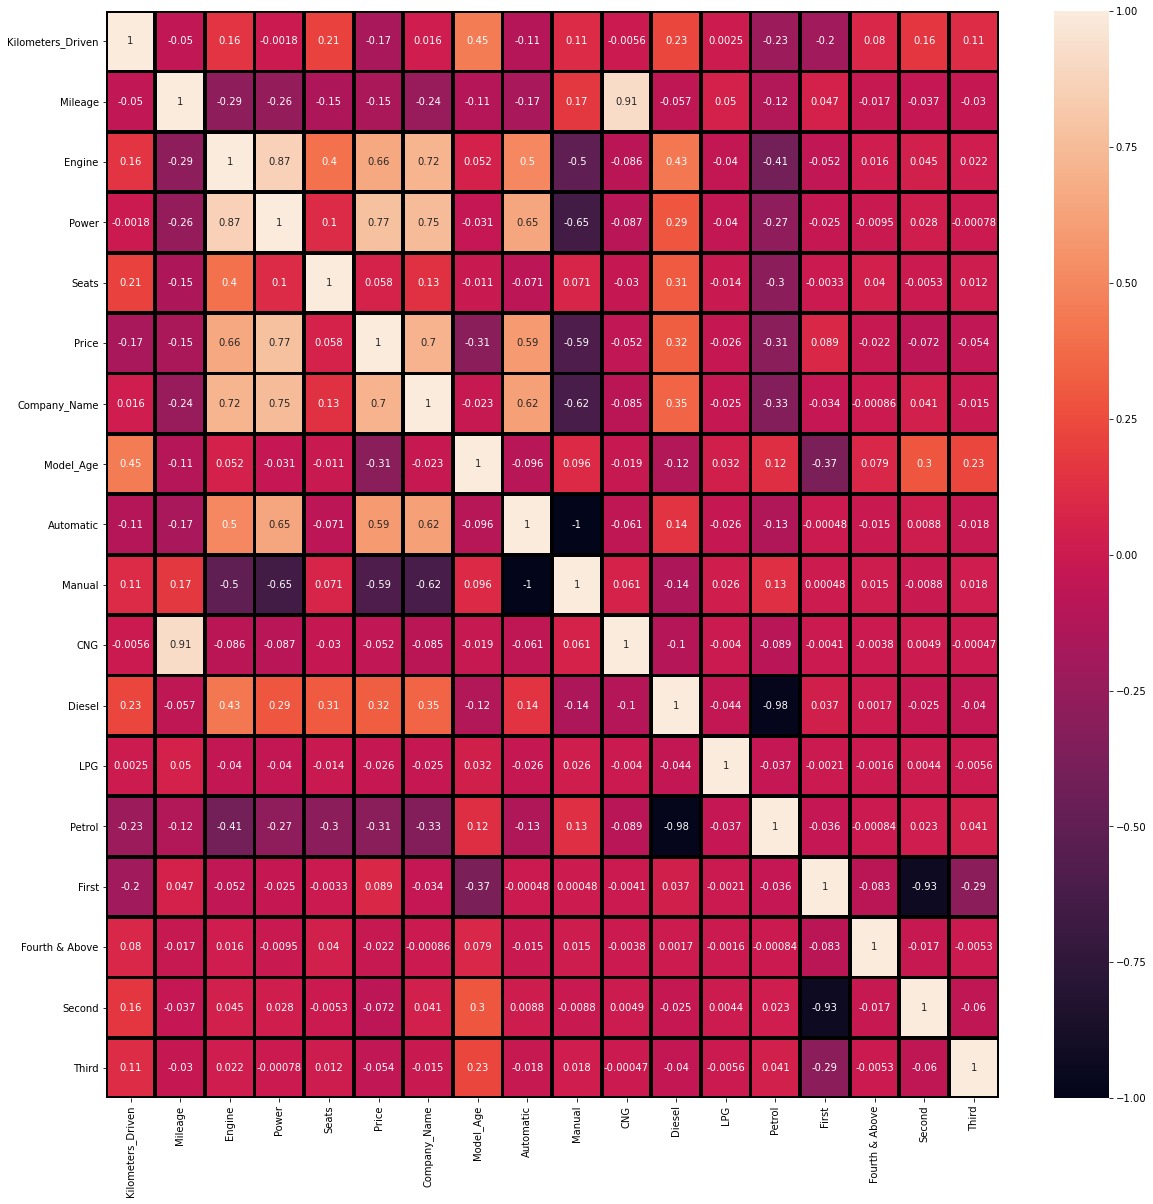

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(usedcars.corr(), annot=True, linewidths=3, linecolor='black')
plt.show()

### Standardising the Numerical Variables

In [130]:
usedcars_std = usedcars

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(usedcars_std[["Kilometers_Driven","Mileage","Engine","Power","Seats","Price","Company_Name","Model_Age"]])
usedcars_std_1 = scaler.transform(usedcars_std[["Kilometers_Driven","Mileage","Engine","Power","Seats","Price","Company_Name","Model_Age"]])


In [132]:
usedcars_std_1 = pd.DataFrame(usedcars_std_1, columns = ["Kilometers_Driven","Mileage","Engine","Power","Seats","Price","Company_Name","Model_Age"])

In [133]:
usedcars_std_2 = usedcars_std.drop(columns = ["Kilometers_Driven","Mileage","Engine","Power","Seats","Price","Company_Name","Model_Age"] )

In [134]:
usedcars_std_merged = pd.merge(usedcars_std_1,usedcars_std_2, left_index = True, right_index = True)

### Libraries

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor

In [136]:
usedcars_X = usedcars.drop(["Price"], axis = 1)
usedcars_y = usedcars["Price"]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(usedcars_X, usedcars_y, test_size=0.3,random_state=100)

In [138]:
usedcars_std_X = usedcars_std_merged.drop(["Price"], axis = 1)
usedcars_std_y = usedcars_std_merged["Price"]

In [139]:
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(usedcars_std_X, usedcars_std_y, test_size=0.3,random_state=100)

In [ ]:
lm = LinearRegression()

## Model 1: Multiple Linear Regression
**(Without standardising the numerical variables)**

In [166]:
r2 = cross_val_score(lm, X_train, y_train, cv=10).mean()
print("Training Set: ",r2)

Training Set:  0.7210032398766583


In [167]:
model1 = lm.fit(X_train, y_train)
y1_pred= model1.predict(X_test)

print("Testing set: ",model1.score(X_test,y_test))

Testing set:  0.7104112380769921


## Model 2: Multiple Linear Regression
**(With Standardising the numerical variables)**

In [144]:
r2 = cross_val_score(lm, X_std_train, y_std_train, cv=10).mean()
print("Training Set: ",r2)

Training Set:  0.7191462864178623


In [145]:
model2 = lm.fit(X_std_train, y_std_train)
y2_pred = model2.predict(X_std_test)

print("Testing set: ",model2.score(X_std_test,y_std_test))

Testing set:  0.7042991408645978


## Model 3: KNN
**(Without standardising the numerical variables)**

In [160]:
for k in range(5):
    k = k+1
    knm = neighbors.KNeighborsRegressor(n_neighbors = k)
    
    r2 = cross_val_score(knm, X_train, y_train, cv = 10).mean()
    print("Training Set: ",r2)
    
    model3 = knm.fit(X_train, y_train)
    y3_pred=model3.predict(X_test)
    print("Testing set_r2: ",k, "is: ", model3.score(X_test,y_test))

Training Set:  0.3780570045249174
Testing set_r2:  1 is:  0.44134407662131836
Training Set:  0.5246110479033362
Testing set_r2:  2 is:  0.5328321078436435
Training Set:  0.5525463271489063
Testing set_r2:  3 is:  0.5555641399428588
Training Set:  0.5552480778223579
Testing set_r2:  4 is:  0.5526560142561114
Training Set:  0.5547661831952857
Testing set_r2:  5 is:  0.5521754171355131


## Model 4: KNN
**(With Standardising the numerical variables)**

In [164]:
for k in range(7):
    k = k+1
    knm = neighbors.KNeighborsRegressor(n_neighbors = k)
    
    r2 = cross_val_score(knm, X_std_train, y_std_train, cv = 10).mean()
    print("Training Set: ",r2)
    
    model4 = knm.fit(X_std_train, y_std_train)
    y4_pred = model4.predict(X_std_test)
    print("Testing set_r2: ",k, "is: ", model4.score(X_std_test,y_std_test))

Training Set:  0.7570294616588811
Testing set_r2:  1 is:  0.8014995774625
Training Set:  0.824891387072763
Testing set_r2:  2 is:  0.8498529911694128
Training Set:  0.8376344468197324
Testing set_r2:  3 is:  0.8520801677334826
Training Set:  0.8483022421280915
Testing set_r2:  4 is:  0.8489568155286139
Training Set:  0.8460685999733281
Testing set_r2:  5 is:  0.8557891856293599
Training Set:  0.8450486630892339
Testing set_r2:  6 is:  0.845596047124932
Training Set:  0.8488990672057601
Testing set_r2:  7 is:  0.8399650590310328


## Model 5: Decision Tree
**(Without standardising the numerical variables)**

In [165]:
dtr = DecisionTreeRegressor()

In [141]:
r2 = cross_val_score(dtr, X_train, y_train, cv=10).mean()
print("Training Set: ",r2)

Training Set:  0.7210032398766583


In [168]:
model5 = dtr.fit(X_train, y_train)
y5_pred= model5.predict(X_test)

print("Testing set: ",model5.score(X_test,y_test))

Testing set:  0.7662455613597013


## Model 6: Decision Tree
**(With standardising the numerical variables)**

In [169]:
r2 = cross_val_score(dtr, X_std_train, y_std_train, cv=10).mean()
print("Training Set: ",r2)

Training Set:  0.7928135912977647


In [170]:
model6 = dtr.fit(X_std_train, y_std_train)
y6_pred= model6.predict(X_std_test)

print("Testing set: ",model5.score(X_std_test,y_std_test))

Testing set:  0.7798581915943421
